# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

from sklearn import metrics
import statsmodels.formula.api as smf

In [4]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot: xlabel='Age', ylabel='Tardies'>

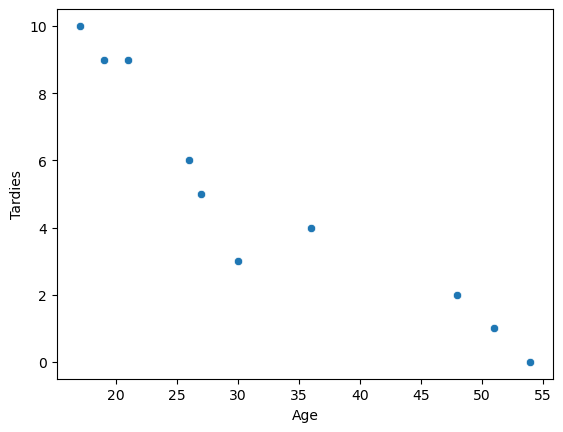

In [12]:
# Your code here.
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 

""" There is a clear negative correlation, older student tend to be less late than the young ones """

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [33]:
# Your response here.
corr = student_data.corr()
cov = student_data.cov()
print("covariance:", cov.iloc[0,1], "correlation:", corr.iloc[0,1])

# The correlation standarize the measures between the to variables
student_data[["Age"]]

covariance: -45.56666666666666 correlation: -0.9391626886887121


,Age
0,17
1,51
2,27
3,21
4,36
5,48
6,19
7,26
8,54
9,30


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [55]:
# Your response here.


from sklearn.linear_model import LinearRegression  
lr = LinearRegression()
lr.fit(student_data[["Age"]], student_data.Tardies)  
a = lr.intercept_ 
b = lr.coef_[0]

def tardies_age(age):
    tardy = a + b * age
    return tardy

student_data["prediction"] = student_data["Age"].apply(lambda x: tardies_age(x))
student_data

# The outcome variable is the tardiness. The regression im using is lineal regression using OLS


,Age,Tardies,prediction
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

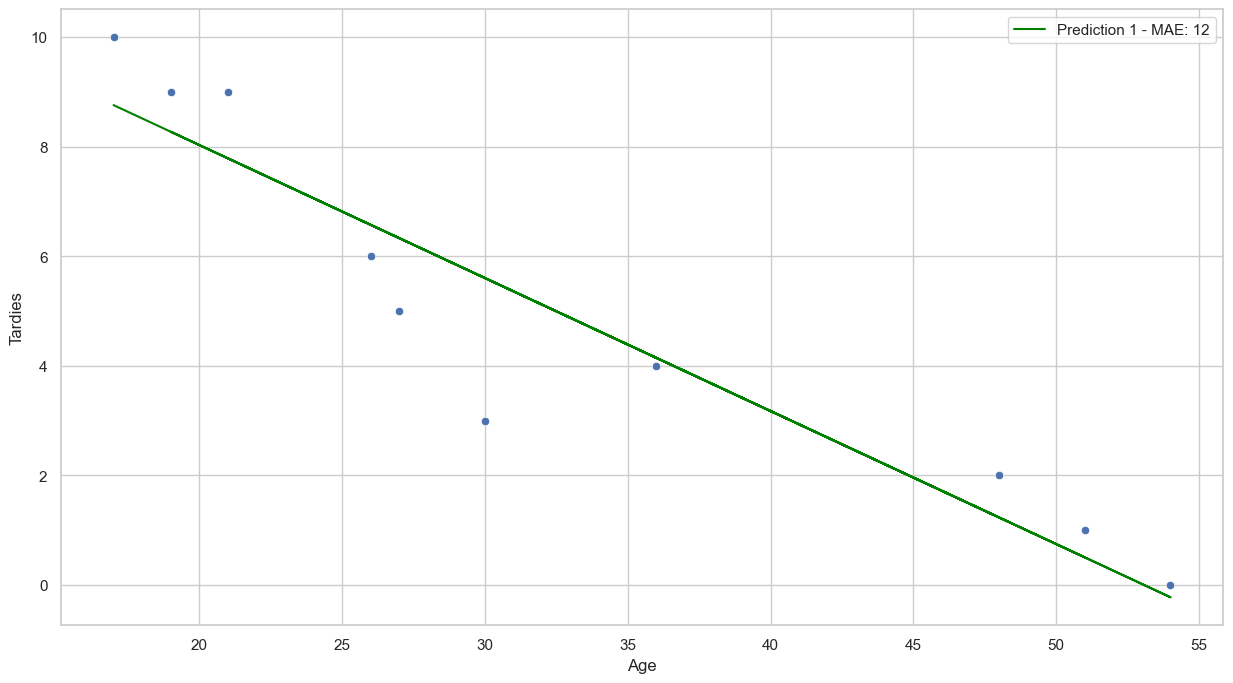

In [53]:
# Your code here.
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data["prediction"], c="green", label="Prediction 1 - MAE: 12")
# plt.plot(student_data.Age, student_data.prediction_2, c="red", label="Prediction 2 - MAE: 18")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [65]:
# Your response here. 
r2 = metrics.r2_score(student_data["Tardies"], student_data["prediction"])
mse = metrics.mean_squared_error(student_data["Tardies"], student_data["prediction"])

print("r2:",r2,"\n","mse:",mse)


# It sure it is a good predictor, it explains almost the 90% of the variance and in average the model will 
# have on average a error of 1.3 from the real value

r2: 0.8820265558250109 
 mse: 1.3319201847356268


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [82]:
# Import any libraries you may need & the data
df = pd.read_csv("vehicles.csv")
df.head()

def columns_for_sql(df):
    column = pd.Series(df.columns).apply(lambda x: x.lower().replace(" ","_"))
    column = column.apply(lambda x: re.sub("[^A-Za-z0-9|_]","",x))
    column = list(column)
    df.columns = column
    return df

df = columns_for_sql(df)
df

,make,model,year,engine_displacement,cylinders,transmission,drivetrain,vehicle_class,fuel_type,fuel_barrelsyear,city_mpg,highway_mpg,combined_mpg,co2_emission_gramsmile,fuel_costyear
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [107]:
# Your response here. 

X = ["year","cylinders", "cylinders", "fuel_barrelsyear", "combined_mpg", "fuel_costyear"]
lst = []
for i in X:
    lst.append((i,(np.corrcoef(df["co2_emission_gramsmile"], df[i])[0][1])))
    
pd.DataFrame(lst, columns=["Variable","Correlation"])

# The Year is the variable that provides the least amount of information

,Variable,Correlation
0,year,-0.222300
1,cylinders,0.752393
2,cylinders,0.752393
3,fuel_barrelsyear,0.986189
4,combined_mpg,-0.926229
5,fuel_costyear,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [117]:
# Your response here. 
ols = smf.ols("co2_emission_gramsmile ~ year + cylinders + fuel_barrelsyear + combined_mpg + fuel_costyear", data=df)
ols.fit().summary()

# We are using ordinary least square regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     co2_emission_gramsmile   R-squared:                       0.981
Model:                                OLS   Adj. R-squared:                  0.981
Method:                     Least Squares   F-statistic:                 3.687e+05
Date:                    Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                            14:02:42   Log-Likelihood:            -1.5173e+05
No. Observations:                   35952   AIC:                         3.035e+05
Df Residuals:                       35946   BIC:                         3.035e+05
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          769.8883     19.392     39.702      0.000     731.880     807.897
year                -0.3206      0.010    -33.060      0.000      -0.340      -0.302
cylinders            1.8788      0.083     22.598      0.000       1.716       2.042
fuel_barrelsyear    19.0529      0.061    311.600      0.000      18.933      19.173
combined_mpg        -3.0404      0.042    -71.645      0.000      -3.124      -2.957
fuel_costyear        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
Full barrels per year is the most important variable as its coeficient is the highest of them all, besides it is 
stadistically significant.

The summary suggests that year and combined mpg are negatively related to the co2 emission while the rest of the 
are positively related. The pvalue of each variable is lower than 0.1% so we can point out the correlations with
enough confidence

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 